Latihan Manchine Learning 1 Studi Kasus Klasifikasi Jenis Obat

1. Library yang digunakan

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('drug200.csv')

2. Data Understanding / Analisa

In [5]:
data.shape

(200, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
data.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [9]:
data.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

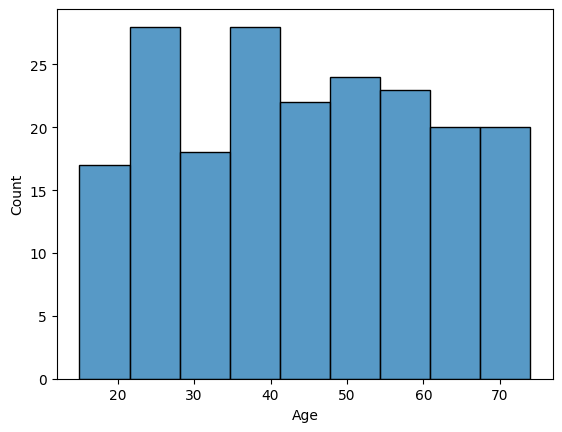

In [11]:
sns.histplot(data['Age'])

3. Cleaning Data

In [12]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(0)

4. Exploratory Data Analysis (EDA)

C:\Users\Dewa Permana\AppData\Local\Temp\ipykernel_6900\2654177447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=data, palette='muted')


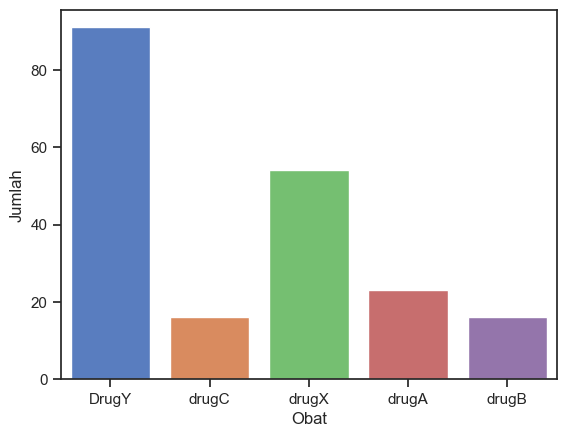

In [21]:
sns.set_theme(style='ticks')
sns.countplot(x='Drug', data=data, palette='muted')
plt.xlabel('Obat')
plt.ylabel('Jumlah')
plt.show()

C:\Users\Dewa Permana\AppData\Local\Temp\ipykernel_6900\533493342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sex', data=data, palette='deep')


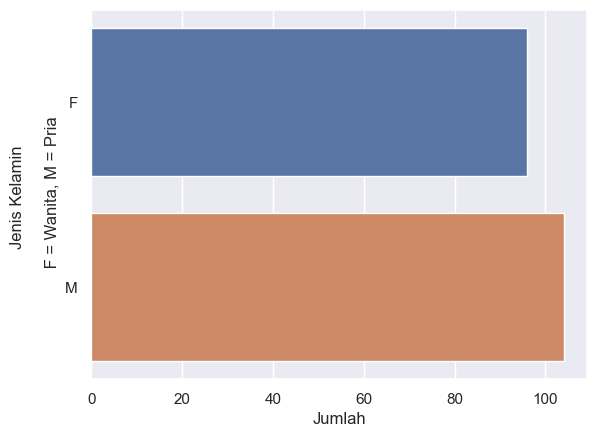

In [29]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Sex', data=data, palette='deep')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Kelamin \n\n F = Wanita, M = Pria')
plt.show()

5. Data Preparation

In [30]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [32]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [34]:
X = data.drop(columns=['Drug'])
Y = data['Drug']

print('X:', X.shape)
print('Y:', Y.shape)

X: (200, 5)
Y: (200,)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

X_train: (160, 5)
X_test: (40, 5)
Y_train: (160,)
Y_test: (40,)


6. Modeling (KNN)

In [39]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train, Y_train)
Y_pred = Knn.predict(X_test)
Knn_accuracy = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))
print('Akurasi KNN : {:.2f}%'.format(Knn_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

Akurasi KNN : 77.50%


7. Testing

In [43]:
testing = {'Age': [55], 'Sex': [0], 'BP': [2], 'Cholesterol': [0], 'Na_to_K': [7.798]}
testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,55,0,2,0,7.798


In [44]:
predict = Knn.predict(testing)
print("Obatnya Pasien : ", predict)

Obatnya Pasien :  [2]
